<a href="https://colab.research.google.com/github/yeeh-l/Signal-System-Hw2020/blob/circleci-project-setup/2020_05_05_%E6%9C%9F%E4%B8%AD%E8%80%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 >2020/05/05 期中考           資工二_B0729066_葉冠志<br></h1>

<H3>Get thinkdsp & numpy

In [1]:
!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py"
!wget "https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkplot.py"
import thinkdsp 
import thinkplot
import numpy as np

--2020-05-05 04:41:51--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48075 (47K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  46.95K  --.-KB/s    in 0.02s   

2020-05-05 04:41:51 (1.91 MB/s) - ‘thinkdsp.py’ saved [48075/48075]

--2020-05-05 04:41:53--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkplot.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22756 (22K) [text/plain]
Saving to: ‘thi

<HR><H1> [1]

In [0]:
class GzTrombone(thinkdsp.Chirp):
    """Represents a trombone-like signal with varying frequency."""
    
    def _evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts)-1)
        freqs = 1 / lengths
        return self._evaluate(ts, freqs)

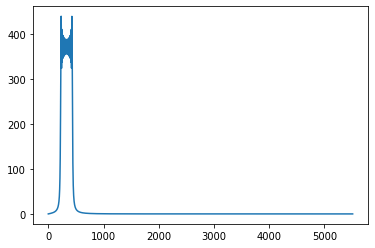

In [168]:
low = 220
high = 440
signal = GzTrombone(low,high)
wave1 = signal.make_wave(duration=1) 
wave1.make_spectrum().plot()

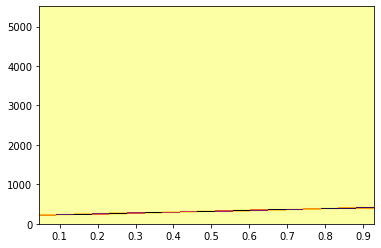

In [167]:
wave1.make_spectrogram(1024).plot()

<HR><H1>[2]
<BR><H2>(1)

In [0]:
class UncorrelatedGaussianNoise(thinkdsp.Noise):

    def evaluate(self, ts):
        ys = np.random.normal(0, self.amp, len(ts))
        return ys

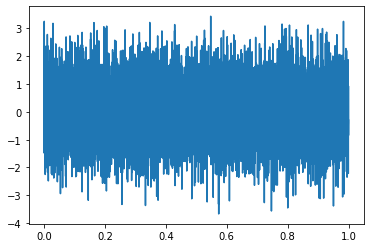

In [169]:
x= thinkdsp.UncorrelatedGaussianNoise().make_wave(duration=1,framerate=10000).plot()

In [170]:
x= thinkdsp.UncorrelatedGaussianNoise().make_wave()
x.ys.shape

(11025,)

<H2>(2)

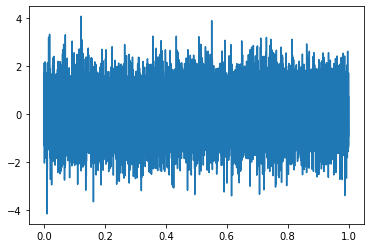

In [49]:
x.plot()

In [38]:
x.ys.max()

4.066583436315377

In [40]:
x.ys.mean()

-0.010592397755742293

In [41]:
x.ys.std()

0.9932826397394704

<H2>(3)

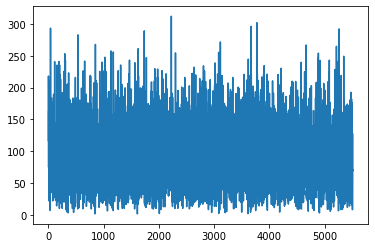

In [46]:
sx = x.make_spectrum()
sx.plot()

In [47]:
sx.hs.shape

(5513,)

<H2>(4)

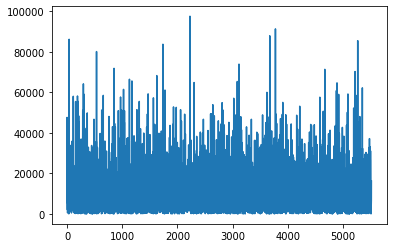

In [79]:
sx.plot_power()

<H2>(5)

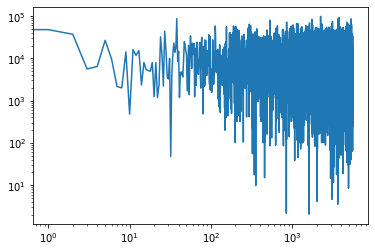

In [172]:
sx.plot_power()
import matplotlib.pyplot as pl
pl.xscale('log'); pl.yscale('log')

<H2>(6)

In [85]:
x.make_spectrum().estimate_slope() 

LinregressResult(slope=-0.027034240694481973, intercept=8.916172235466055, rvalue=-0.020891793437849204, pvalue=0.12092957063539861, stderr=0.017428814804778266)

<H2>(7)

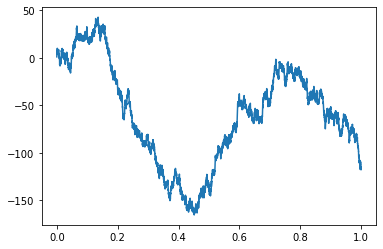

In [89]:
y = x.cumsum()
y.plot()

<H2>(8)

In [94]:
y.make_spectrum().estimate_slope()

LinregressResult(slope=-1.8238835400345437, intercept=23.567765513541765, rvalue=-0.8466449337265644, pvalue=0.0, stderr=0.015444034178652762)

<H2>(9)

LinregressResult(slope=-1.78917593603383, intercept=14.302301211025494, rvalue=-0.843304147822676, pvalue=0.0, stderr=0.016128646989827567)

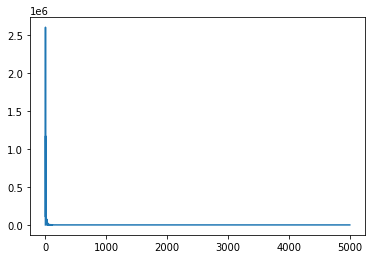

In [97]:
import thinkdsp as td

xRed= td.BrownianNoise()
z= xRed.make_wave(duration=1,framerate=10000)
z.make_spectrum().plot_power()
z.make_spectrum().estimate_slope()

<H2>(10)

In [103]:
x.make_spectrum().estimate_slope() 

LinregressResult(slope=-0.027034240694481973, intercept=8.916172235466055, rvalue=-0.020891793437849204, pvalue=0.12092957063539861, stderr=0.017428814804778266)

In [104]:
y.make_spectrum().estimate_slope() 

LinregressResult(slope=-1.8238835400345437, intercept=23.567765513541765, rvalue=-0.8466449337265644, pvalue=0.0, stderr=0.015444034178652762)

In [105]:
z.make_spectrum().estimate_slope() 

LinregressResult(slope=-1.78917593603383, intercept=14.302301211025494, rvalue=-0.843304147822676, pvalue=0.0, stderr=0.016128646989827567)

<H3>  Z比較接近Y

<HR><H1>[3]

<H2>(1)

In [0]:
af = '/content/^GSPC.csv'
import pandas as pd
df = pd.read_csv(af)

<H2>(2)

In [119]:
df.head(-5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...,...
23183,2020-04-20,2845.620117,2868.979980,2820.429932,2823.159912,2823.159912,5220160000
23184,2020-04-21,2784.810059,2785.540039,2727.100098,2736.560059,2736.560059,5075830000
23185,2020-04-22,2787.889893,2815.100098,2775.949951,2799.310059,2799.310059,5049660000
23186,2020-04-23,2810.419922,2844.899902,2794.260010,2797.800049,2797.800049,5756520000


In [123]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [124]:
df.count

<bound method DataFrame.count of              Date         Open  ...    Adj Close      Volume
0      1927-12-30    17.660000  ...    17.660000           0
1      1928-01-03    17.760000  ...    17.760000           0
2      1928-01-04    17.719999  ...    17.719999           0
3      1928-01-05    17.549999  ...    17.549999           0
4      1928-01-06    17.660000  ...    17.660000           0
...           ...          ...  ...          ...         ...
23188  2020-04-27  2854.649902  ...  2878.479980  5194260000
23189  2020-04-28  2909.959961  ...  2863.389893  5672880000
23190  2020-04-29  2918.459961  ...  2939.510010  6620140000
23191  2020-04-30  2930.909912  ...  2912.429932  6523120000
23192  2020-05-01  2869.090088  ...  2830.709961  4753160000

[23193 rows x 7 columns]>

ANS: 23193 rows  & 7columns

<H2>(3)


In [0]:
ys = df['Close'].values  
ts = np.arange(len(ys)) #df['Date'].values

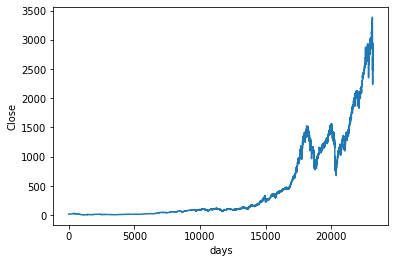

In [144]:
wave = thinkdsp.Wave(ys, ts, framerate=1)
wave.plot()
thinkplot.config(ylabel='Close')
thinkplot.config(xlabel='days') #'Time (days)')

<H3>最近5000筆資料:

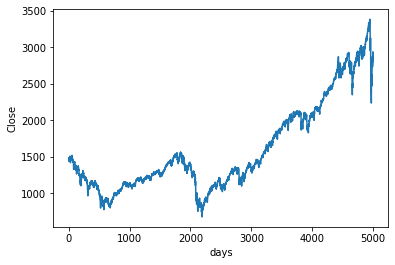

In [148]:
ys = df['Close'].values [-5000:]
ts = np.arange(len(ys)) #df['Date'].values
wave2 = thinkdsp.Wave(ys, ts, framerate=1)
wave2.plot()
thinkplot.config(ylabel='Close')
thinkplot.config(xlabel='days') #'Time (days)'

<H2>(4)

In [0]:
ys??

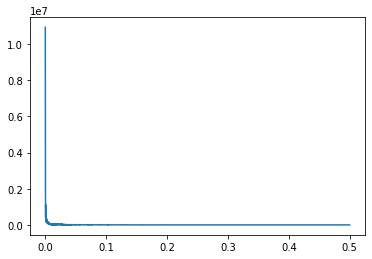

In [157]:
wave.make_spectrum().plot()

In [158]:
wave.make_spectrum().estimate_slope()

LinregressResult(slope=-1.823103114253003, intercept=12.805906355789396, rvalue=-0.9142977855070099, pvalue=0.0, stderr=0.007500801758783336)

<H4>類似 用cumsum()函數做出來的娥相關高斯分布噪音，判斷依據為估測的斜率。

<H1>END<BR><H3>Ch01-Exercises 資工二_B0729066_葉冠志
<HR>